In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rcParams["font.size"] = 12
plt.rcParams['xtick.labelsize'] = 12.
plt.rcParams['ytick.labelsize'] = 12.
plt.rcParams['axes.unicode_minus'] = False

CHART_NAME = 'seaborn2'
cnt, PNG, UNDERBAR = 0, '.png', '_'
filename = '../data/mpg.csv'

mpg = pd.read_csv(filename, encoding='utf-8')

In [2]:
mpg.head(10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


In [3]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [4]:
def save():
    global cnt
    cnt += 1
    savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
    plt.savefig(savefile, dpi=400)
    print(savefile + '파일이 저장되었습니다.')
#end

In [5]:
import seaborn as sns

displ = mpg['displ']

In [6]:
import numpy as np

print(np.max(displ.unique()))
print(np.min(displ.unique()))

7.0
1.6


seaborn2_01.png파일이 저장되었습니다.


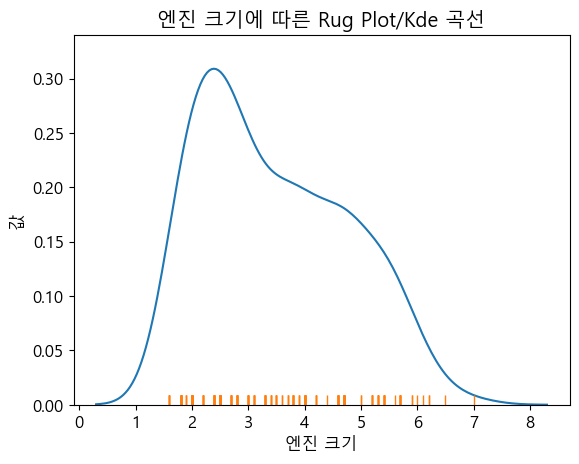

In [7]:
fig, ax = plt.subplots()
sns.kdeplot(data=mpg, x="displ", ax=ax)
ax = sns.rugplot(data=mpg, x="displ", ax=ax)
ax.set_title('엔진 크기에 따른 Rug Plot/Kde 곡선')
ax.set_xlabel('엔진 크기')
ax.set_ylabel('값')
save()

seaborn2_02.png파일이 저장되었습니다.


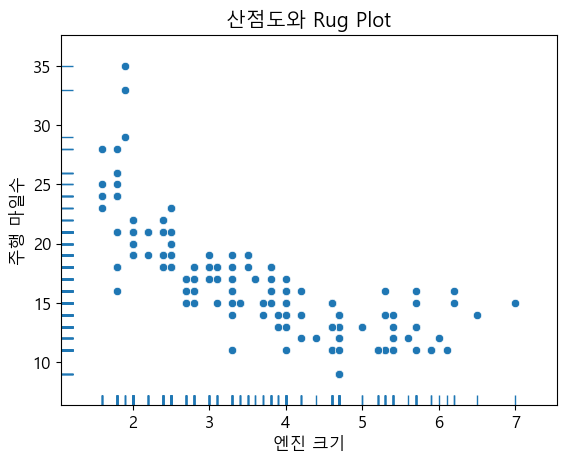

In [8]:
fig, ax = plt.subplots()
sns.scatterplot(data=mpg, x='displ', y='cty', ax=ax)
ax = sns.rugplot(data=mpg, x='displ', y='cty', ax=ax)
ax.set_title('산점도와 Rug Plot')
ax.set_xlabel('엔진 크기')
ax.set_ylabel('주행 마일수')
save()

seaborn2_03.png파일이 저장되었습니다.


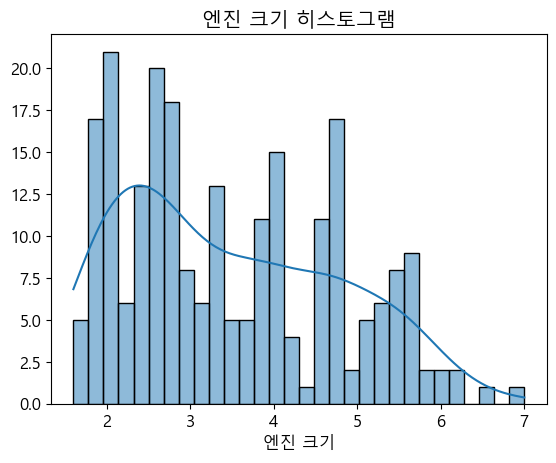

In [9]:
fig, ax = plt.subplots()
sns.histplot(data=mpg, x='displ', kde=True, bins=30, ax=ax)
ax.set_title('엔진 크기 히스토그램')
ax.set_xlabel('엔진 크기')
ax.set_ylabel('')
save()

In [10]:
print(mpg['drv'].unique())

['f' '4' 'r']


In [11]:
label_dict = {'f':'전륜 구동', '4':'사륜 구동', 'r':'후륜 구동'}

def setLabel(x):
    return label_dict[x]

idx = 0
mpg['drv'] = mpg['drv'].apply(setLabel)

print('구동 방식별 갯수')
result = mpg.groupby('drv')['drv'].count()
print(result)

구동 방식별 갯수
drv
사륜 구동    103
전륜 구동    106
후륜 구동     25
Name: drv, dtype: int64


seaborn2_05.png파일이 저장되었습니다.


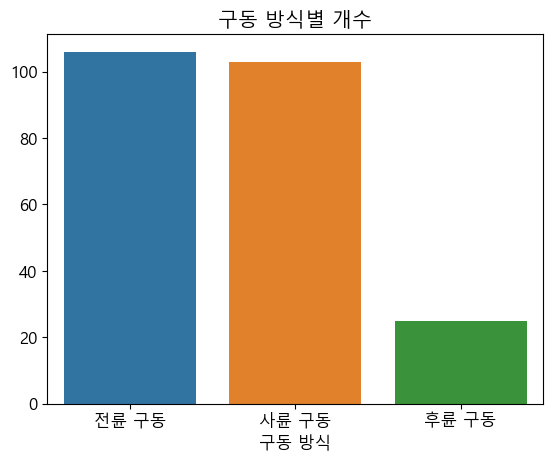

In [13]:
plt.figure()
ax = sns.countplot(x="drv", data=mpg, hue='drv')
ax.set_title('구동 방식별 개수')
ax.set_xlabel('구동 방식')
ax.set_ylabel('')
save()

In [15]:
print(mpg['cyl'].unique())

[4 6 8 5]


In [17]:
print('실린더 개수')
result = mpg.groupby('cyl')['cyl'].count()
print(result)

실린더 개수
cyl
4    81
5     4
6    79
8    70
Name: cyl, dtype: int64


seaborn2_09.png파일이 저장되었습니다.


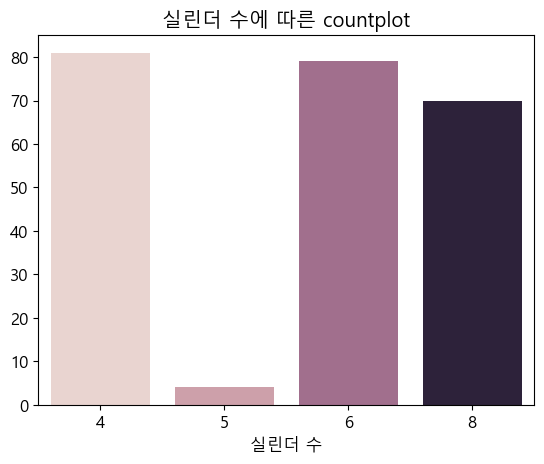

In [22]:
plt.figure()
ax = sns.countplot(x="cyl", data=mpg, hue='cyl', legend=False)
ax.set_title('실린더 수에 따른 countplot')
ax.set_xlabel('실린더 수')
ax.set_ylabel('')
save()

seaborn2_10.png파일이 저장되었습니다.


<Figure size 640x480 with 0 Axes>

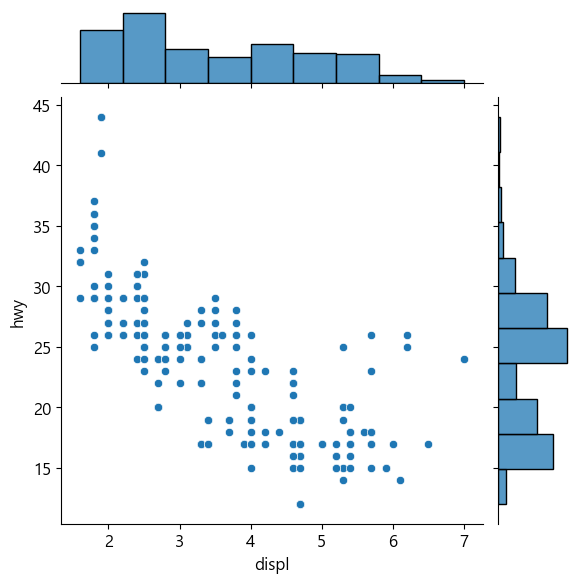

In [23]:
plt.figure()
ax = sns.jointplot(x="displ", y='hwy', data=mpg)
save()

seaborn2_11.png파일이 저장되었습니다.


<Figure size 640x480 with 0 Axes>

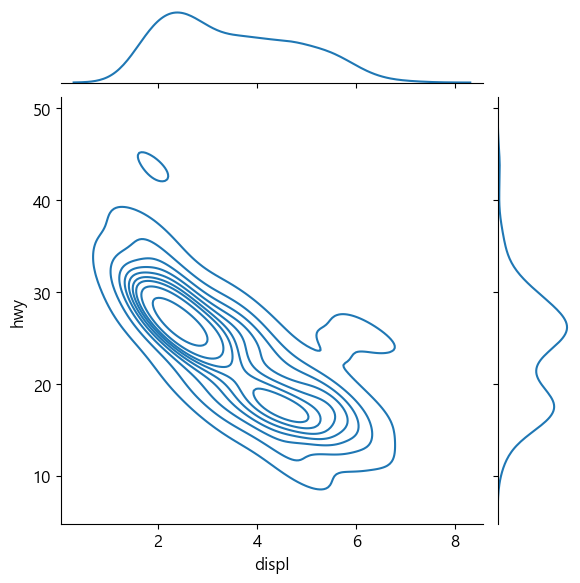

In [24]:
plt.figure()
ax = sns.jointplot(x="displ", y='hwy', data=mpg, kind="kde")
save()

seaborn2_12.png파일이 저장되었습니다.


<Figure size 640x480 with 0 Axes>

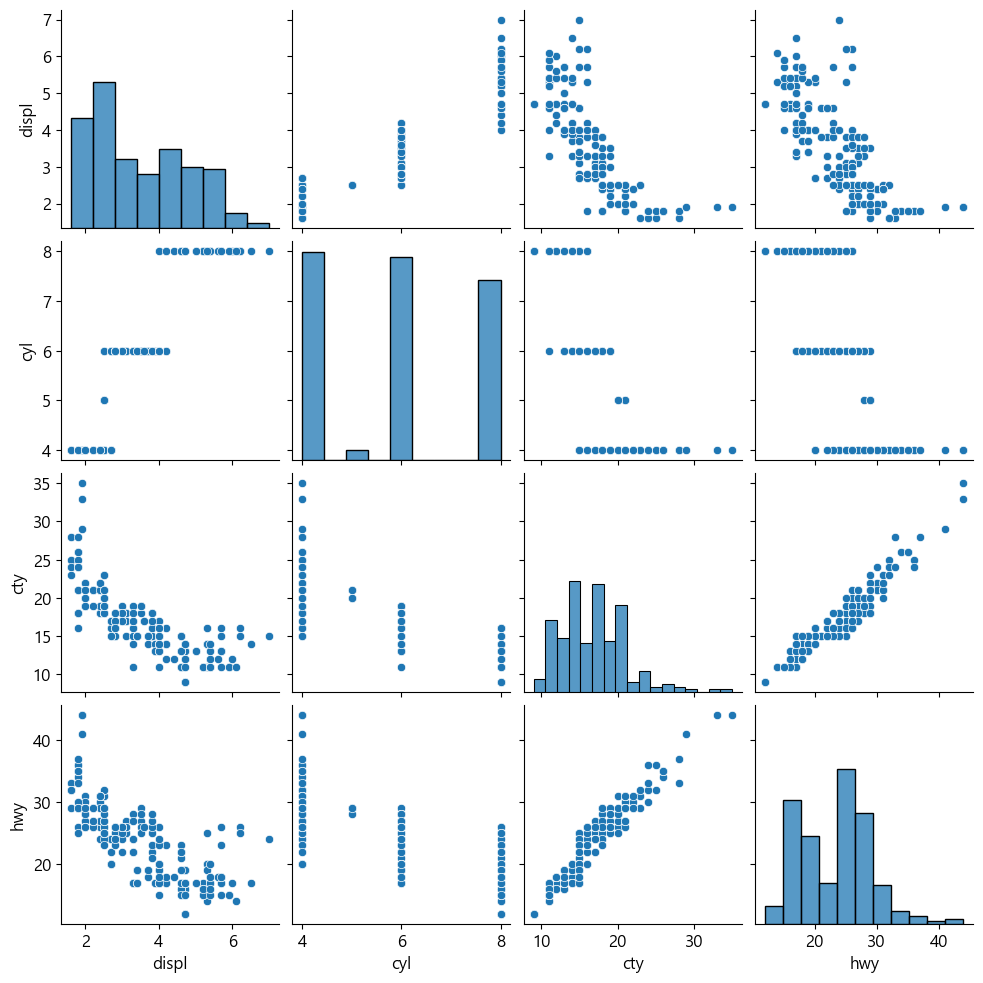

In [28]:
plt.figure()
newmpg = mpg.loc[:, ['displ', 'cyl', 'cty', 'hwy']]
ax = sns.pairplot(data=newmpg)
save()

seaborn2_13.png파일이 저장되었습니다.


<Figure size 640x480 with 0 Axes>

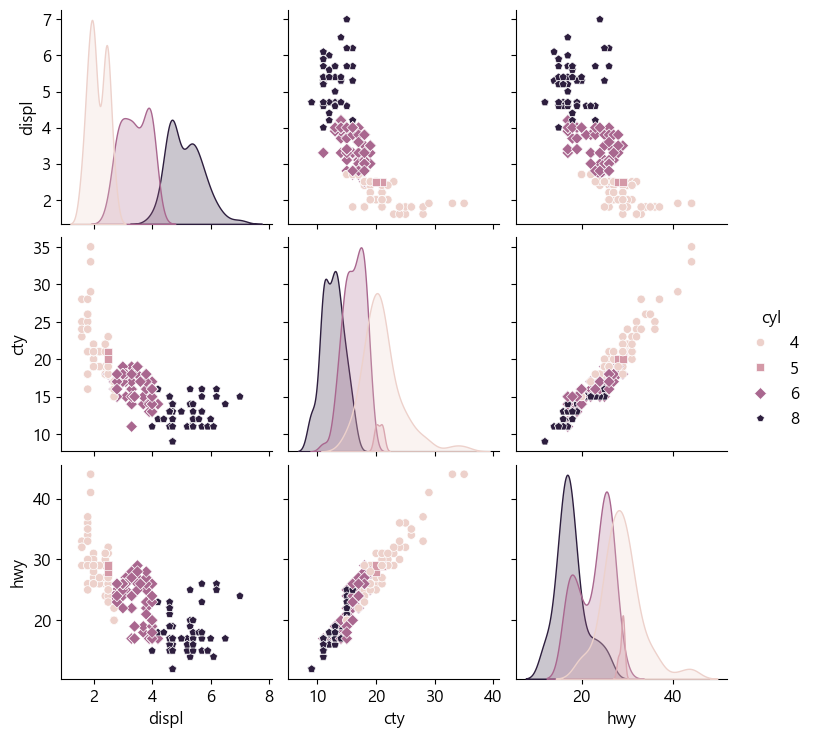

In [29]:
plt.figure()
ax = sns.pairplot(data=newmpg, hue="cyl", markers=["o", "s", "D", "p"])
save()

In [31]:
mpg_size = mpg.pivot_table(
    index="drv", columns="cyl", aggfunc="size", fill_value=0)
mpg_size

cyl,4,5,6,8
drv,,,,
사륜 구동,23,0,32,48
전륜 구동,58,4,43,1
후륜 구동,0,0,4,21


seaborn2_14.png파일이 저장되었습니다.


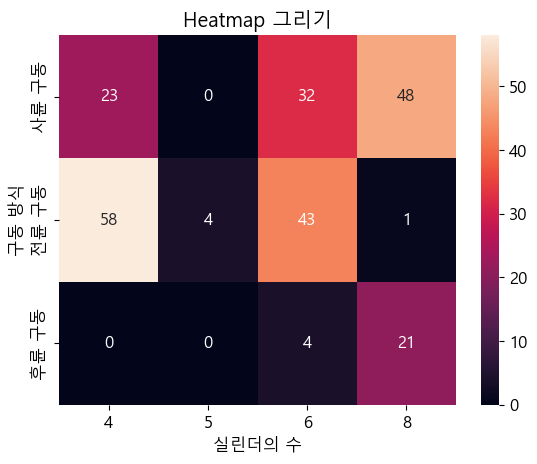

In [33]:
plt.figure()
ax = sns.heatmap(mpg_size, annot=True, fmt="d")
ax.set_title('Heatmap 그리기')
ax.set_xlabel('실린더의 수')
ax.set_ylabel('구동 방식')
save()

seaborn2_16.png파일이 저장되었습니다.


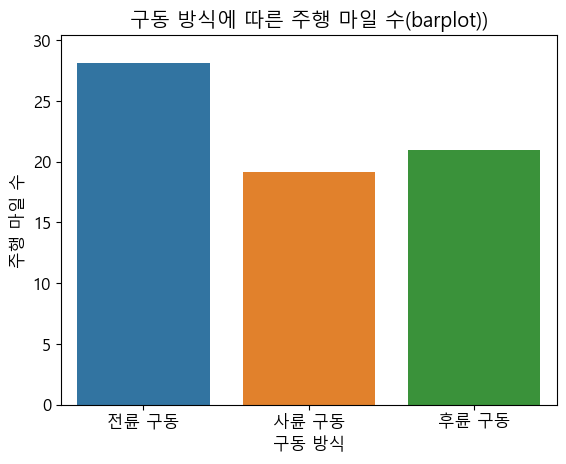

In [35]:
plt.figure()
ax = sns.barplot(x="drv", y='hwy', data=mpg, hue='drv',err_kws={'linewidth': 0})
ax.set_title('구동 방식에 따른 주행 마일 수(barplot))')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일 수')
save()

seaborn2_17.png파일이 저장되었습니다.


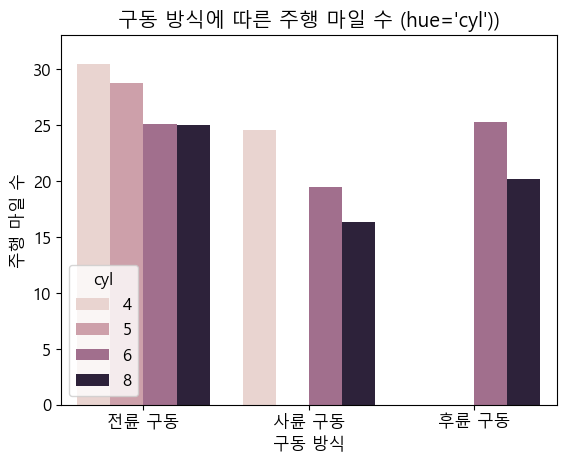

In [37]:
plt.figure()
ax = sns.barplot(x='drv', y='hwy', hue='cyl', data=mpg, err_kws={'linewidth': 0})
ax.set_title("구동 방식에 따른 주행 마일 수 (hue='cyl'))")
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일 수')
save()

In [38]:
print('구동 방식에 따른 주행 마일 수의 통계치 정보')
mygrouping = mpg.groupby('drv')['hwy']
mygrouping.describe()

구동 방식에 따른 주행 마일 수의 통계치 정보


,count,mean,std,min,25%,50%,75%,max
drv,,,,,,,,
사륜 구동,103.0,19.174757,4.078704,12.0,17.0,18.0,22.0,28.0
전륜 구동,106.0,28.160377,4.206881,17.0,26.0,28.0,29.0,44.0
후륜 구동,25.0,21.000000,3.662877,15.0,17.0,21.0,24.0,26.0


seaborn2_19.png파일이 저장되었습니다.


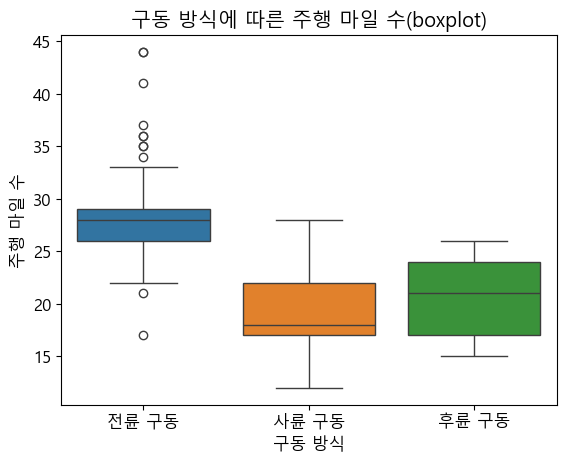

In [40]:
plt.figure()
ax = sns.boxplot(x='drv', y='hwy', hue='drv', data=mpg)
ax.set_title('구동 방식에 따른 주행 마일 수(boxplot)')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일 수')
save()

seaborn2_20.png파일이 저장되었습니다.


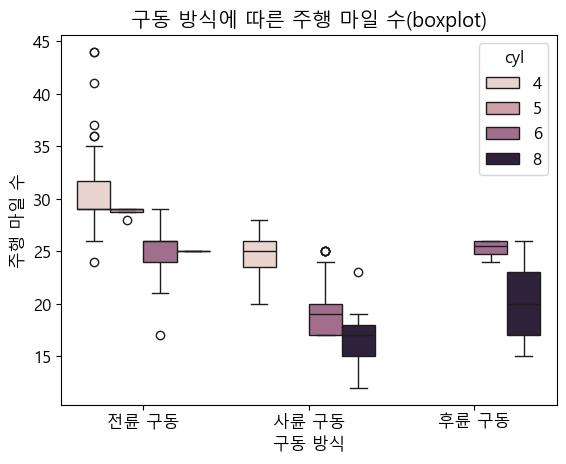

In [41]:
plt.figure()
ax = sns.boxplot(x='drv', y='hwy', hue='cyl', data=mpg)
ax.set_title('구동 방식에 따른 주행 마일 수(boxplot)')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일 수')
save()

seaborn2_21.png파일이 저장되었습니다.


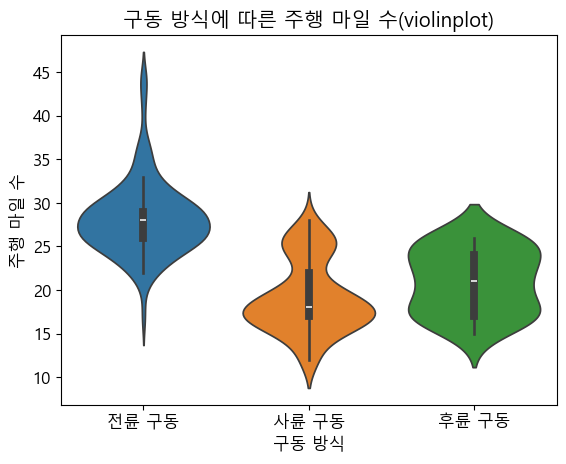

In [42]:
plt.figure()
ax = sns.violinplot(x='drv', y='hwy', hue='drv', data=mpg)
ax.set_title('구동 방식에 따른 주행 마일 수(violinplot)')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일 수')
save()

seaborn2_22.png파일이 저장되었습니다.


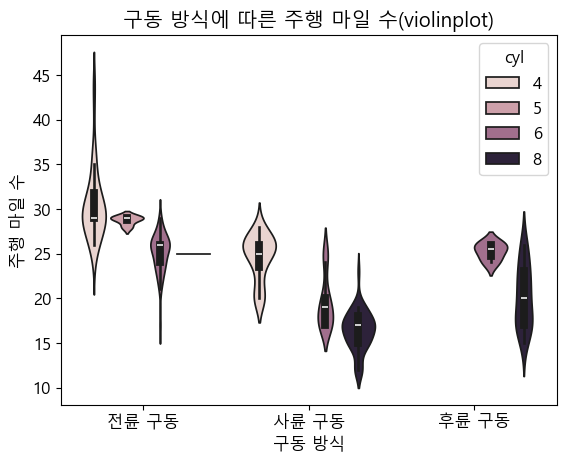

In [43]:
plt.figure()
ax = sns.violinplot(x='drv', y='hwy', hue='cyl', data=mpg)
ax.set_title('구동 방식에 따른 주행 마일 수(violinplot)')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일 수')
save()

seaborn2_24.png파일이 저장되었습니다.


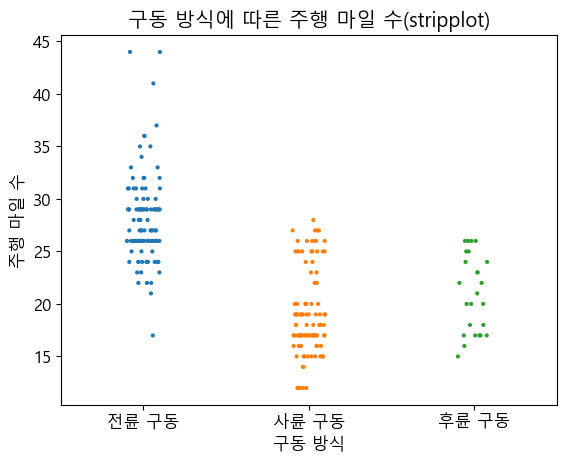

In [45]:
STRIP_SIZE = 3

plt.figure()
ax = sns.stripplot(x='drv', y='hwy', hue='drv', data=mpg, jitter=True, size=STRIP_SIZE)
ax.set_title('구동 방식에 따른 주행 마일 수(stripplot)')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일 수')
save()

seaborn2_25.png파일이 저장되었습니다.


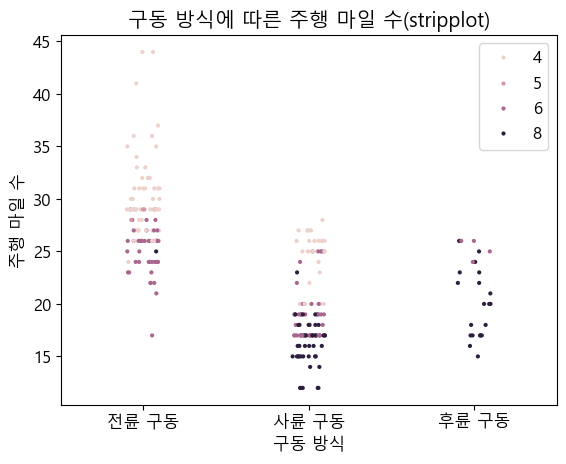

In [46]:
STRIP_SIZE = 3

plt.figure()
ax = sns.stripplot(x='drv', y='hwy', hue='cyl', data=mpg, jitter=True, size=STRIP_SIZE)
ax.set_title('구동 방식에 따른 주행 마일 수(stripplot)')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일 수')
plt.legend(loc=1)
save()

seaborn2_26.png파일이 저장되었습니다.


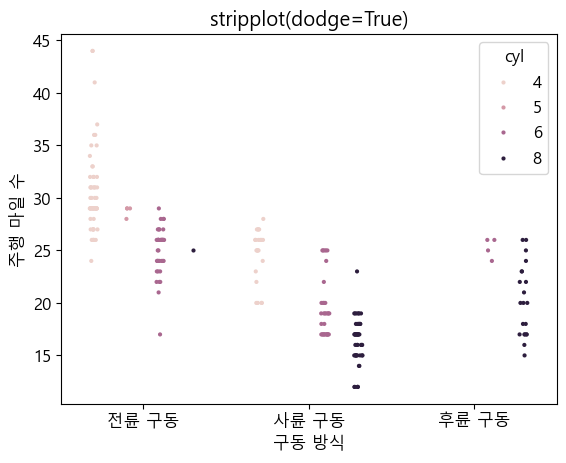

In [47]:
plt.figure()
ax = sns.stripplot(x='drv', y='hwy', hue='cyl', data=mpg, jitter=True, dodge=True, size=STRIP_SIZE)
ax.set_title('stripplot(dodge=True)')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일 수')
save()

seaborn2_29.png파일이 저장되었습니다.


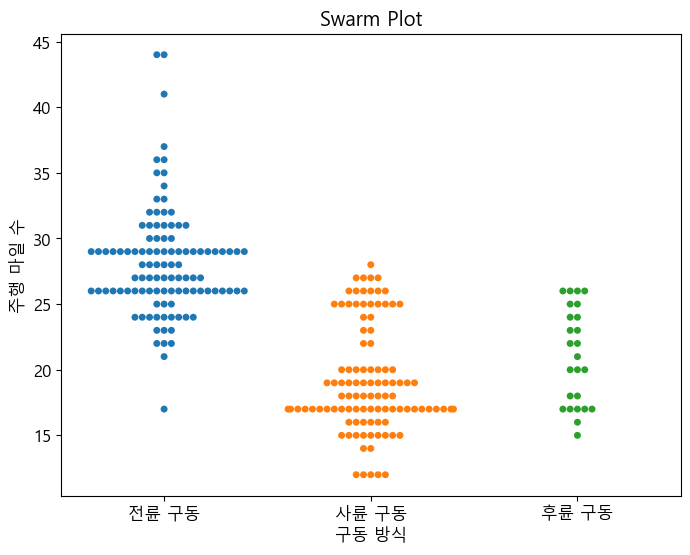

In [50]:
# 데이터가 많아서 오류나면 size지정해서 키우기 
plt.figure(figsize=(8,6))
ax = sns.swarmplot(x='drv', y='hwy', hue='drv', data=mpg)
ax.set_title('Swarm Plot')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일 수')
save()

seaborn2_31.png파일이 저장되었습니다.


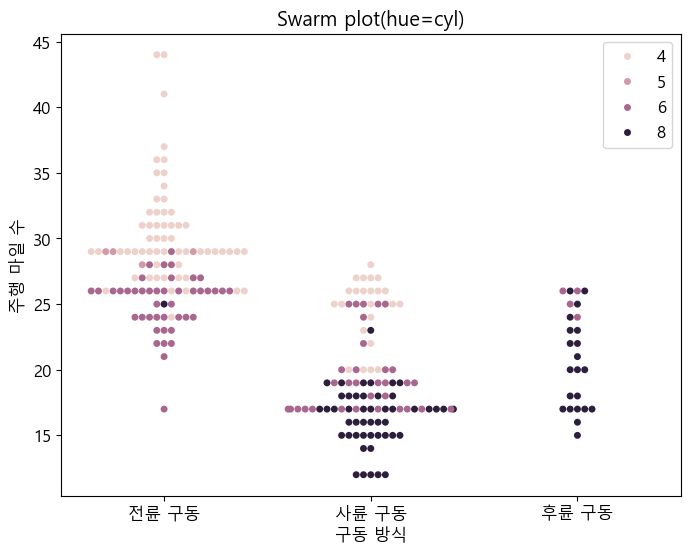

In [52]:
plt.figure(figsize=(8,6))
ax = sns.swarmplot(x='drv', y='hwy', hue='cyl', data=mpg)
ax.set_title('Swarm plot(hue=cyl)')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일 수')
plt.legend(loc=1)
save()

seaborn2_32.png파일이 저장되었습니다.


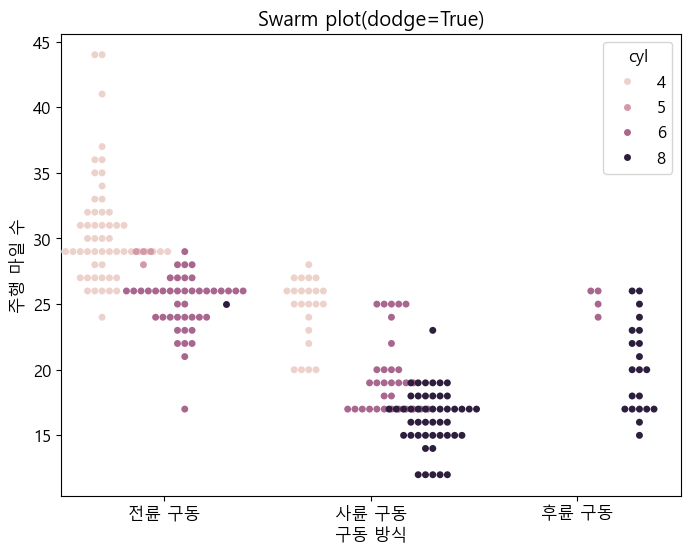

In [53]:
plt.figure(figsize=(8,6))
ax = sns.swarmplot(x='drv', y='hwy', hue='cyl', data=mpg, dodge=True)
ax.set_title('Swarm plot(dodge=True)')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일 수')
save()

seaborn2_41.png파일이 저장되었습니다.


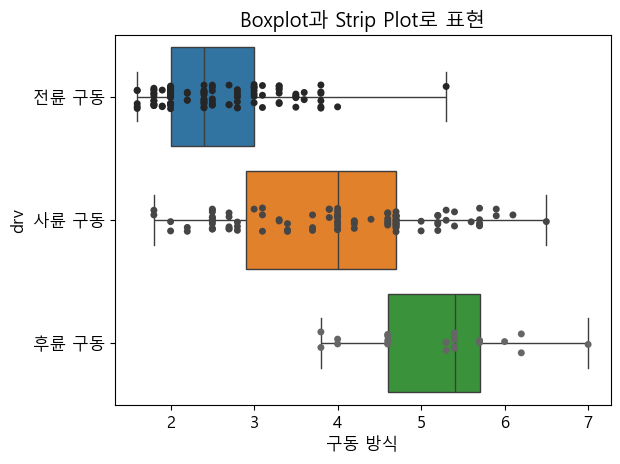

In [67]:
import numpy as np
plt.figure()
sns.boxplot(x='displ', y='drv', hue='drv', data=mpg, whis=np.inf)
ax = sns.stripplot(x='displ', y='drv', hue='drv', data=mpg, jitter=True, palette='dark:0.4')
ax.set_title("Boxplot과 Strip Plot로 표현")
ax.set_xlabel('엔진 크기')
ax.set_xlabel('구동 방식')
save()

seaborn2_43.png파일이 저장되었습니다.


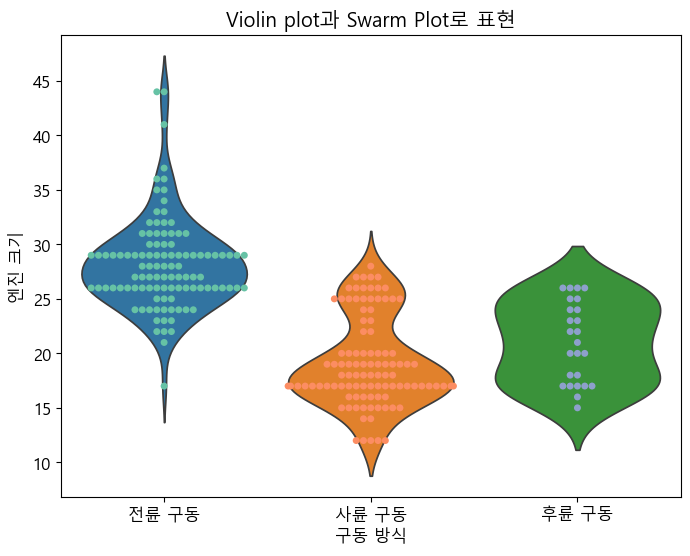

In [78]:
plt.figure(figsize=(8,6))
sns.violinplot(x='drv', y='hwy', hue='drv',data=mpg, inner=None)
ax = sns.swarmplot(x='drv', y='hwy',hue='drv', data=mpg, palette='Set2')
ax.set_title("Violin plot과 Swarm Plot로 표현")
ax.set_xlabel('구동 방식')
ax.set_ylabel('엔진 크기')
save()

seaborn2_44.png파일이 저장되었습니다.
seaborn2_45.png파일이 저장되었습니다.
seaborn2_46.png파일이 저장되었습니다.


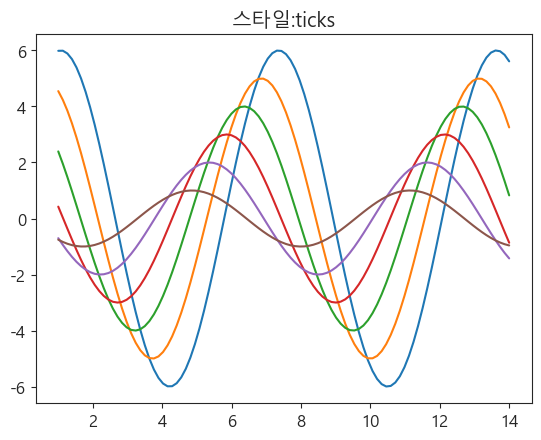

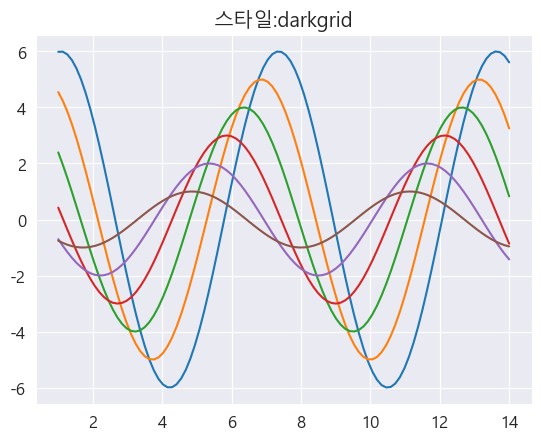

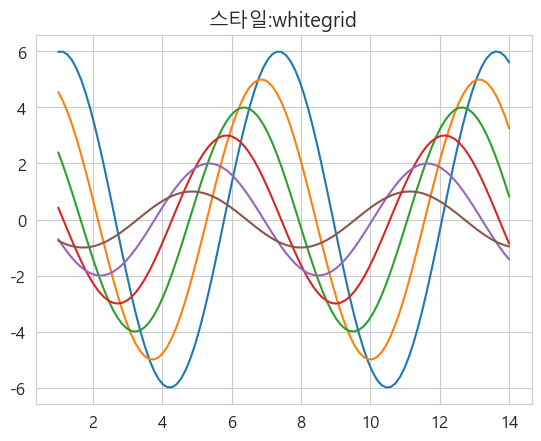

In [79]:
def sine_plot(mytitle):
    plt.figure()
    plt.rc('font', family='Malgun Gothic')
    x = np.linspace(1, 14, 100)
    for i in range(1,7):
        plt.plot(x, np.sin(x + i * .5) * (7-i))
    plt.title('스타일:' + mytitle)
    save()

styles = ["ticks", "darkgrid", "whitegrid"]
for one in styles:
    sns.set_style(one)
    sine_plot(one)